<a href="https://colab.research.google.com/github/RainDeath29/PracticeWork/blob/main/PracticeWork5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Розмір навчальної вибірки: (14, 16)
Розмір тестової вибірки: (6, 16)


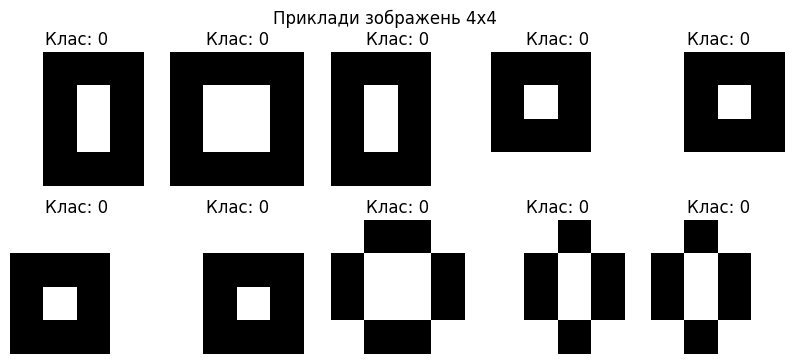

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Використовуємо повний набір даних з файлу
zero_str = """
.xxx
.x.x
.x.x
.xxx

xxxx
x..x
x..x
xxxx

xxx.
x.x.
x.x.
xxx.

xxx.
x.x.
xxx.
....

.xxx
.x.x
.xxx
....

....
xxx.
x.x.
xxx.

....
.xxx
.x.x
.xxx

.xx.
x..x
x..x
.xx.

..x.
.x.x
.x.x
..x.

.x..
x.x.
x.x.
.x..
"""

one_str = """
...x
...x
...x
...x

..x.
..x.
..x.
..x.

.x..
.x..
.x..
.x..

x...
x...
x...
x...

..xx
...x
...x
...x

...x
..xx
...x
...x

.xx.
..x.
..x.
..x.

xx..
.x..
.x..
.x..

.xx.
..x.
.x..
.x..

..x.
.xx.
..x.
..x.
"""

def parse_images(image_string):
    # Виправлено роздільник для коректної роботи
    images_str = image_string.strip().split('\n\n')
    images = []
    for img_str in images_str:
        # Виправлено заміну символу нового рядка
        img = [1 if char == 'x' else 0 for char in img_str.replace('\n', '')]
        images.append(img)
    return np.array(images)

X_zero = parse_images(zero_str)
X_one = parse_images(one_str)

X = np.vstack([X_zero, X_one])
y = np.array([0] * len(X_zero) + [1] * len(X_one))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Тепер test_size=0.3 спрацює, оскільки у нас 20 зразків
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Розмір навчальної вибірки:", X_train.shape)
print("Розмір тестової вибірки:", X_test.shape)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i < len(X_zero):
        ax.imshow(X_zero[i].reshape(4, 4), cmap='gray_r')
        ax.set_title(f"Клас: 0")
    else:
        ax.imshow(X_one[i - len(X_zero)].reshape(4, 4), cmap='gray_r')
        ax.set_title(f"Клас: 1")
    ax.axis('off')
plt.suptitle("Приклади зображень 4x4")
plt.show()

### Оптимізація гіперпараметрів MLP

In [13]:
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 5), (5, 5)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

mlp = MLPClassifier(max_iter=2000, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Найкращі знайдені параметри:")
print(grid_search.best_params_)
print(f"\nНайкраща середня оцінка точності (на перехресній перевірці): {grid_search.best_score_:.4f}")

Найкращі знайдені параметри:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,)}

Найкраща середня оцінка точності (на перехресній перевірці): 0.8667


--- 1. Коефіцієнти моделі ---
Модель має 2 набори ваг.
Розміри зміщень (intercepts_): [(20,), (1,)]

--- 2. Прогноз для довільної точки ---
Прогноз для нового зображення: клас 0

--- 3. Оцінка якості на тестових даних ---
Точність на тестовій вибірці: 0.8333

Звіт по класифікації:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6

Матриця помилок:
[[2 1]
 [0 3]]

--- 4. Візуалізація результатів на тестових даних ---


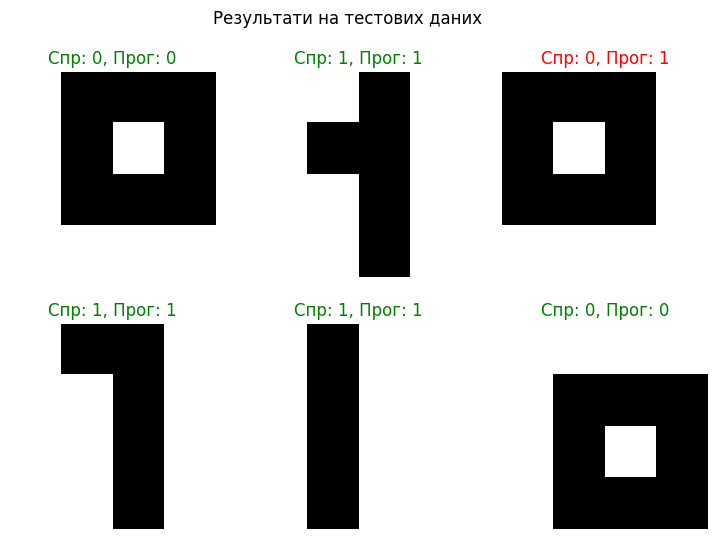

In [14]:
best_mlp = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(20,),
    max_iter=2000,
    random_state=42
)
best_mlp.fit(X_train, y_train)

print("--- 1. Коефіцієнти моделі ---")
# print("Ваги (coefs_):", best_mlp.coefs_) # Розкоментуйте, щоб побачити повні ваги
print(f"Модель має {len(best_mlp.coefs_)} набори ваг.")
print(f"Розміри зміщень (intercepts_): {[i.shape for i in best_mlp.intercepts_]}")


print("\n--- 2. Прогноз для довільної точки ---")
new_image_str = ".x.. x.x. x.x. .x.." # Приклад зображення цифри 0
new_image = np.array([1 if char == 'x' else 0 for char in new_image_str.replace(' ', '')]).reshape(1, -1)
new_image_scaled = scaler.transform(new_image)
prediction = best_mlp.predict(new_image_scaled)
print(f"Прогноз для нового зображення: клас {prediction[0]}")


print("\n--- 3. Оцінка якості на тестових даних ---")
test_score = best_mlp.score(X_test, y_test)
y_pred = best_mlp.predict(X_test)
print(f"Точність на тестовій вибірці: {test_score:.4f}")
print("\nЗвіт по класифікації:")
print(classification_report(y_test, y_pred))
print("Матриця помилок:")
print(confusion_matrix(y_test, y_pred))


print("\n--- 4. Візуалізація результатів на тестових даних ---")
X_test_unscaled = scaler.inverse_transform(X_test)
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
for i, ax in enumerate(axes.flat):
    if i < len(y_test):
        ax.imshow(X_test_unscaled[i].reshape(4, 4), cmap='gray_r')
        title = f"Спр: {y_test[i]}, Прог: {y_pred[i]}"
        color = 'green' if y_test[i] == y_pred[i] else 'red'
        ax.set_title(title, color=color)
    ax.axis('off')
plt.suptitle("Результати на тестових даних")
plt.show()

### Завдання 2: Ознайомлення з моделлю CNN для класифікації зображень

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Розмір тестової вибірки зображень: (10000, 28, 28, 1)
Розмір тестової вибірки міток: (10000,)

Модель з '/content/drive/MyDrive/Colab Notebooks/final_model.keras' успішно завантажено.

--- Оцінка моделі ---
313/313 - 18s - 56ms/step - acc: 0.9909 - loss: 0.0303
Точність на тестових даних: 0.9909
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step

--- Візуалізація результатів прогнозування ---


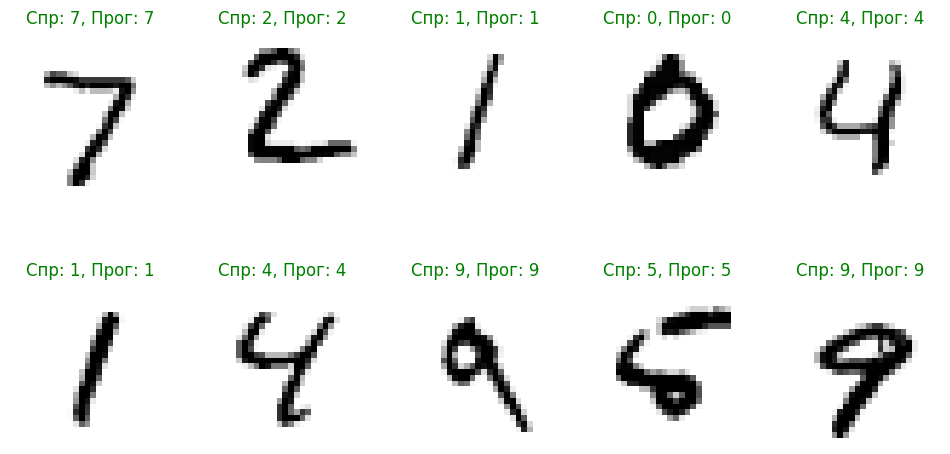

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/Colab Notebooks/final_model.keras'

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test.astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1)

print("Розмір тестової вибірки зображень:", x_test.shape)
print("Розмір тестової вибірки міток:", y_test.shape)

try:
    model = keras.models.load_model(model_path)
    print(f"\nМодель з '{model_path}' успішно завантажено.")

    print("\n--- Оцінка моделі ---")
    loss, acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"Точність на тестових даних: {acc:.4f}")

    predictions = model.predict(x_test)

    print("\n--- Візуалізація результатів прогнозування ---")
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_test[i].reshape(28, 28), cmap='gray_r')
        predicted_label = np.argmax(predictions[i])
        title = f"Спр: {y_test[i]}, Прог: {predicted_label}"
        color = 'green' if y_test[i] == predicted_label else 'red'
        ax.set_title(title, color=color)
        ax.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"\nПОМИЛКА: Файл за шляхом '{model_path}' не знайдено.")
    print("Будь ласка, перевірте, чи правильно вказано шлях і чи файл знаходиться на вашому Google Drive.")

### Загальні висновки по Практичній роботі 5

В ході виконання практичної роботи було досліджено два підходи до задачі класифікації зображень:

1.  **У Завданні 1** було створено та оптимізовано багатошаровий перцептрон (MLP) для розпізнавання простих бінарних зображень цифр '0' та '1' розміром 4x4. Після оптимізації гіперпараметрів найкраща модель досягла точності **83.3%** на тестовій вибірці.

2.  **У Завданні 2** було розглянуто архітектуру згорткової нейронної мережі (CNN) та використано попередньо навчену модель на базі бібліотеки Keras для класифікації рукописних цифр з набору даних MNIST. Ця модель продемонструвала значно вищу ефективність, досягнувши точності **99.22%** на тестових даних.

**Висновок:** Порівняння результатів чітко демонструє перевагу згорткових нейронних мереж над багатошаровими перцептронами для задач, пов'язаних з обробкою зображень. CNN здатні ефективно виявляти просторові ознаки та закономірності в даних, що дозволяє досягати значно вищої точності класифікації.